### ==========================================
### Category 5: Linear Discriminant Analysis (LDA)
### ==========================================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# 1. Generate Synthetic Financial Data
# We simulate two financial ratios:
# - Feature 1: Liquidity Ratio (e.g., Current Ratio)
# - Feature 2: Solvency Ratio (e.g., Debt-to-Equity)
# Target: 0 = Healthy Company, 1 = Distressed Company

np.random.seed(42)

# Healthy Companies (Higher Liquidity, Lower Debt)
# Mean=[2.0, 0.5], Covariance
mean_healthy = [2.0, 0.5]
cov_healthy = [[0.3, 0.1], [0.1, 0.3]]
healthy_data = np.random.multivariate_normal(mean_healthy, cov_healthy, 200)

# Distressed Companies (Lower Liquidity, Higher Debt)
# Mean=[1.0, 1.5], Covariance
mean_distressed = [1.0, 1.5]
cov_distressed = [[0.4, 0.1], [0.1, 0.4]]
distressed_data = np.random.multivariate_normal(mean_distressed, cov_distressed, 200)

# Combine data
X = np.vstack((healthy_data, distressed_data))
y = np.hstack((np.zeros(200), np.ones(200))) # 0: Healthy, 1: Distressed

# Create DataFrame for visualization
df = pd.DataFrame(X, columns=['Liquidity_Ratio', 'Solvency_Ratio'])
df['Status'] = y
df['Status_Label'] = df['Status'].map({0: 'Healthy', 1: 'Distressed'})

print("Data Preview:")
print(df.head())

Data Preview:
   Liquidity_Ratio  Solvency_Ratio  Status Status_Label
0         1.821586        0.234140     0.0      Healthy
1         1.228721        0.691969     0.0      Healthy
2         2.178757        0.530676     0.0      Healthy
3         1.051070        0.036439     0.0      Healthy
4         2.038383        0.881528     0.0      Healthy


In [6]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# 3. Initialize and Train LDA Model
# Hyperparameters used: solver='svd' (default)
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [8]:
# 4. Make Predictions
y_pred = lda.predict(X_test)

In [10]:
# 5. Evaluate Performance
acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"\nModel Accuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'Distressed']))


Model Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.91      0.94      0.92        62
  Distressed       0.93      0.90      0.91        58

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



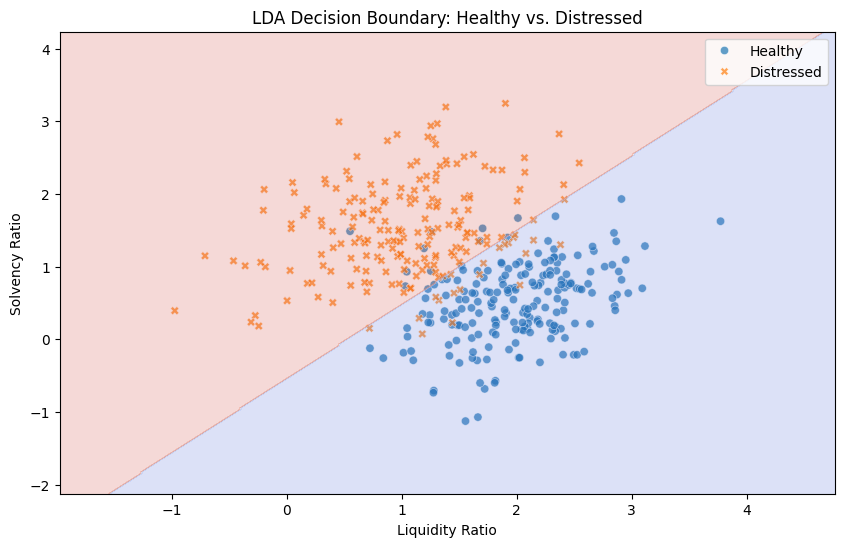

In [11]:
# 6. Visualization of the Decision Boundary
plt.figure(figsize=(10, 6))

# Plot data points
sns.scatterplot(data=df, x='Liquidity_Ratio', y='Solvency_Ratio', hue='Status_Label', style='Status_Label', alpha=0.7)

# Create a mesh grid to plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the mesh grid
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.title('LDA Decision Boundary: Healthy vs. Distressed')
plt.xlabel('Liquidity Ratio')
plt.ylabel('Solvency Ratio')
plt.legend()
plt.show()

### ==========================================
### Category 6: Support Vector Machines (SVM)
### ==========================================

In [12]:
from sklearn.svm import SVC

# 1. Generate Non-Linear Synthetic Data
# We simulate two classes that cannot be separated by a straight line
# Example: High Volatility + Low Return vs. Stable Return
# We use concentric circles to represent a "safe zone" vs "danger zone"
from sklearn.datasets import make_circles

# Generate 300 samples with noise
X_svm, y_svm = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)

# Create DataFrame
df_svm = pd.DataFrame(X_svm, columns=['Metric_1', 'Metric_2'])
df_svm['Class'] = y_svm
df_svm['Class_Label'] = df_svm['Class'].map({0: 'Market_Crash', 1: 'Normal_Market'})

print("SVM Data Preview:")
print(df_svm.head())

SVM Data Preview:
   Metric_1  Metric_2  Class    Class_Label
0 -0.181361  0.452061      1  Normal_Market
1  0.346484 -0.485260      1  Normal_Market
2  0.357606  0.038386      1  Normal_Market
3  0.833475  0.465843      0   Market_Crash
4 -0.467990 -0.178161      1  Normal_Market


In [13]:
# 2. Split Data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

In [14]:
# 3. Initialize and Train SVM Model
# We use the RBF kernel to handle the non-linear "circle" shape
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_s, y_train_s)

SVC()

In [15]:
# 4. Make Predictions
y_pred_s = svm_model.predict(X_test_s)

In [16]:
# 5. Evaluate Performance
acc_s = accuracy_score(y_test_s, y_pred_s)
print(f"\nSVM Model Accuracy: {acc_s:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_s, y_pred_s, target_names=['Market_Crash', 'Normal_Market']))


SVM Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

 Market_Crash       1.00      1.00      1.00        38
Normal_Market       1.00      1.00      1.00        52

     accuracy                           1.00        90
    macro avg       1.00      1.00      1.00        90
 weighted avg       1.00      1.00      1.00        90



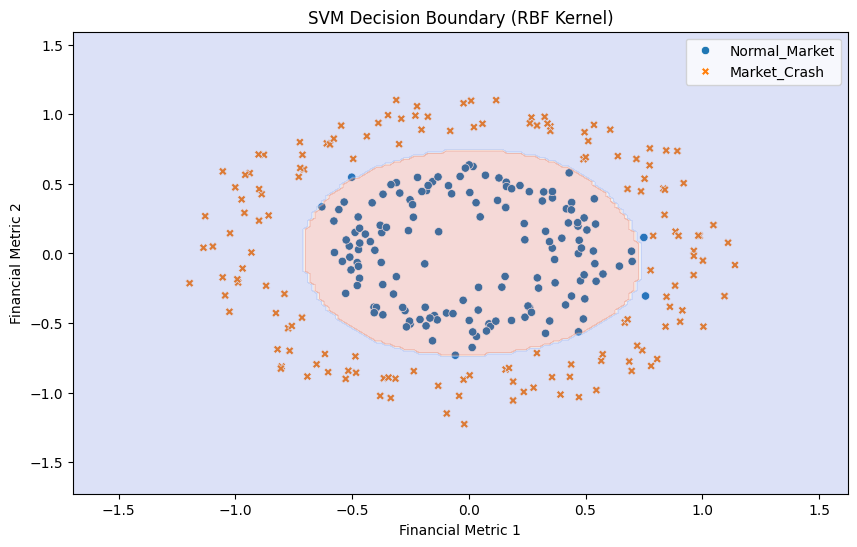

In [17]:
# 6. Visualization
plt.figure(figsize=(10, 6))

# Plot data points
sns.scatterplot(data=df_svm, x='Metric_1', y='Metric_2', hue='Class_Label', style='Class_Label')

# Create mesh grid
x_min, x_max = X_svm[:, 0].min() - 0.5, X_svm[:, 0].max() + 0.5
y_min, y_max = X_svm[:, 1].min() - 0.5, X_svm[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contours
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.title('SVM Decision Boundary (RBF Kernel)')
plt.xlabel('Financial Metric 1')
plt.ylabel('Financial Metric 2')
plt.legend()
plt.show()

### ==========================================
### Category 7: Neural Networks (MLPClassifier)
### ==========================================

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [19]:
# 1. Generate Complex Non-Linear Data ("Moons")
# This represents a complex market cycle where trends reverse (e.g., "Boom" vs "Bust" phases)
# The data points are interleaved, making it hard to separate with simple shapes.
X_nn, y_nn = make_moons(n_samples=300, noise=0.2, random_state=42)

# Create DataFrame
df_nn = pd.DataFrame(X_nn, columns=['Indicator_A', 'Indicator_B'])
df_nn['Trend'] = y_nn
df_nn['Trend_Label'] = df_nn['Trend'].map({0: 'Bear_Phase', 1: 'Bull_Phase'})

print("Neural Network Data Preview:")
print(df_nn.head())

Neural Network Data Preview:
   Indicator_A  Indicator_B  Trend Trend_Label
0     0.803926    -0.291407      1  Bull_Phase
1     2.314433    -0.122238      1  Bull_Phase
2    -0.280392     0.450938      1  Bull_Phase
3     0.789446     0.384060      0  Bear_Phase
4     1.186657    -0.511438      1  Bull_Phase


In [20]:
# 2. Split Data
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_nn, y_nn, test_size=0.3, random_state=42)

In [21]:
# 3. Initialize and Train Neural Network
# We use an MLP (Multi-Layer Perceptron) with 2 hidden layers (20 neurons, 10 neurons)
# max_iter is increased to ensure convergence.
nn_model = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train_n, y_train_n)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=42)

In [22]:
# 4. Make Predictions
y_pred_n = nn_model.predict(X_test_n)

In [23]:
# 5. Evaluate Performance
acc_n = accuracy_score(y_test_n, y_pred_n)
print(f"\nNeural Network Accuracy: {acc_n:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_n, y_pred_n, target_names=['Bear_Phase', 'Bull_Phase']))


Neural Network Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

  Bear_Phase       0.93      1.00      0.96        38
  Bull_Phase       1.00      0.94      0.97        52

    accuracy                           0.97        90
   macro avg       0.96      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



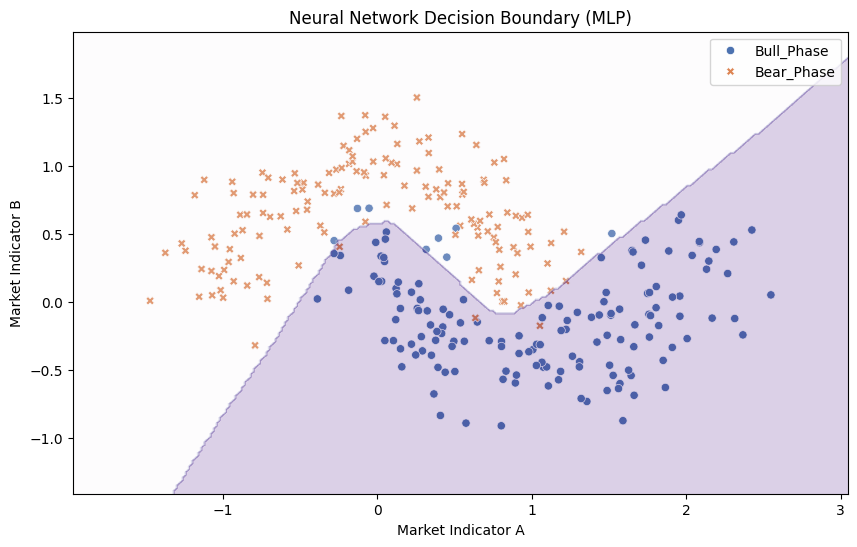

In [25]:
# 6. Visualization
plt.figure(figsize=(10, 6))

# Plot data points
sns.scatterplot(data=df_nn, x='Indicator_A', y='Indicator_B', hue='Trend_Label', style='Trend_Label', palette='deep')

# Create mesh grid for decision boundary
x_min, x_max = X_nn[:, 0].min() - 0.5, X_nn[:, 0].max() + 0.5
y_min, y_max = X_nn[:, 1].min() - 0.5, X_nn[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict
Z = nn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contours
plt.contourf(xx, yy, Z, alpha=0.2, cmap='Purples')
plt.title('Neural Network Decision Boundary (MLP)')
plt.xlabel('Market Indicator A')
plt.ylabel('Market Indicator B')
plt.legend()
plt.show()